<h1 style="text-align:center; color:blue;">
Problem Statement
</h1>

In [1]:
import sys
print(sys.executable)

C:\Users\MY\anaconda3\envs\churn_ds\python.exe


In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

<h2 style="text-align:center; color:blue;">
Dataset Overview
</h2>

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df["Exited"].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

<h2 style="text-align:center; color:blue;">
Data Preprocessing
</h2>

In [10]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [11]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [12]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [13]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False


<h3 style="text-align:center; color:blue;">
Exploratory Data Analaysis
</h3>

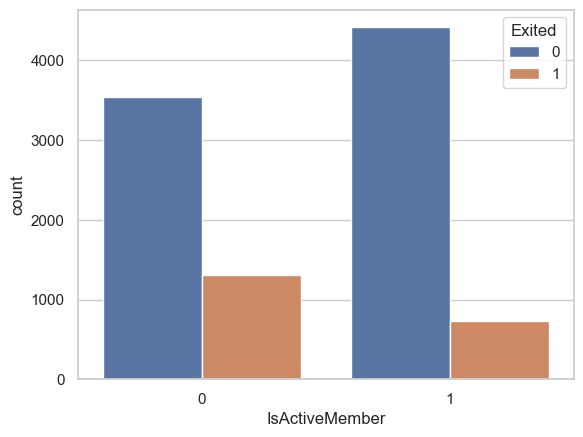

In [16]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()

In [17]:
df.groupby("IsActiveMember")["Exited"].mean()

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

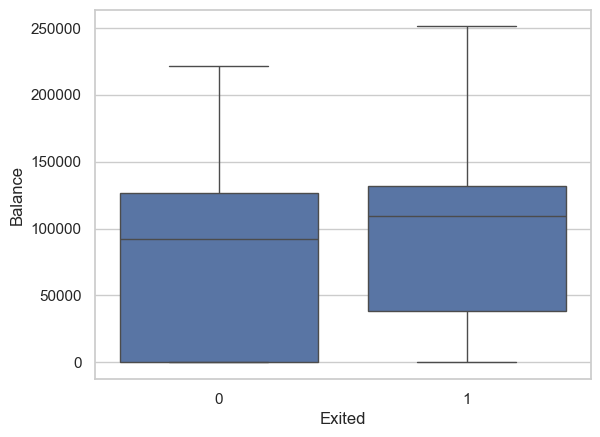

In [18]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.show()

In [19]:
df.groupby("Exited")["Balance"].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [20]:
df.groupby("Exited")["Balance"].median()

Exited
0     92072.68
1    109349.29
Name: Balance, dtype: float64

<h4 style="text-align:center; color:blue;">
Model Training
</h4>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Create model with class balancing
log_bal = LogisticRegression(max_iter=1000, class_weight="balanced")

# Train
log_bal.fit(X_train, y_train)

# Predict
y_pred_log_bal = log_bal.predict(X_test)
y_prob_log_bal = log_bal.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred_log_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log_bal))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1593
           1       0.38      0.70      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000

ROC-AUC: 0.7662546984580882


C:\Users\MY\anaconda3\envs\churn_ds\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC: 0.8522382166449963


In [24]:
results = {
    "Logistic_Balanced": roc_auc_score(y_test, y_prob_log_bal),
    "Random_Forest": roc_auc_score(y_test, y_prob_rf)
}

results

{'Logistic_Balanced': 0.7662546984580882, 'Random_Forest': 0.8522382166449963}

<h2 style="text-align:center; color:blue;">
Feature Importance
</h2>

In [25]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

Age                  0.236846
EstimatedSalary      0.147693
Balance              0.142603
CreditScore          0.142516
NumOfProducts        0.129429
Tenure               0.081576
IsActiveMember       0.039721
Geography_Germany    0.028623
HasCrCard            0.019008
Gender_Male          0.018394
dtype: float64

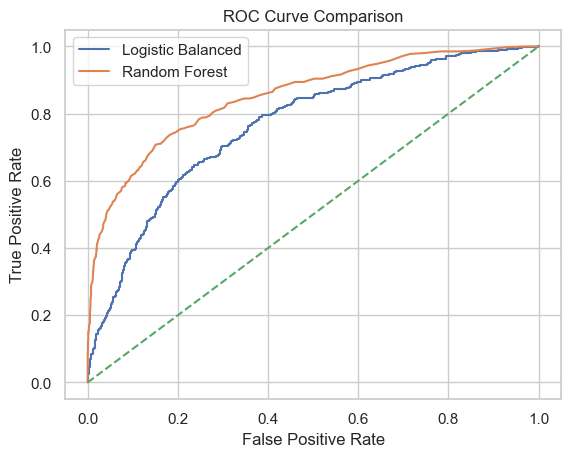

In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_bal)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_log, tpr_log, label="Logistic Balanced")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


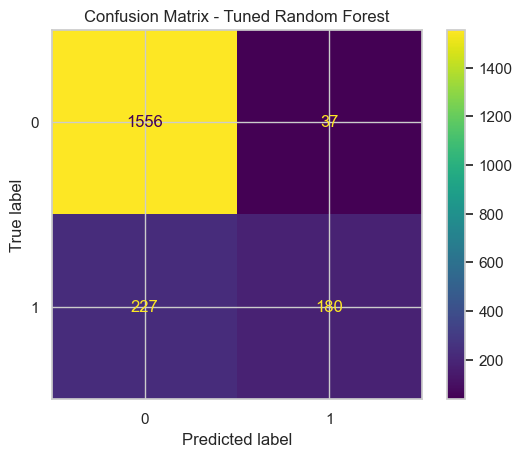

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

<h2 style="text-align:center; color:blue;">
Conclusion
</h2>